In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
rec = pd.read_csv('../Resources/regional_economic_analysis.csv')

In [17]:
# Industries that are most popular amongst each education level 
# median income in each of these industries (according to education)
rec.head()

,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Entry Level Education,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Online Job Ads (HWOL)
0,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,High school diploma or equivalent,28.99,60300.0,2012-2022,10,5,15,904
1,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",High school diploma or equivalent,28.69,59675.0,2012-2022,10,7,17,88
2,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,Bachelor's degree,0.00,0.0,2012-2022,20,23,43,58
3,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,Bachelor's degree,58.22,121102.0,2012-2022,120,109,229,213
4,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,Bachelor's degree,69.80,145193.0,2012-2022,30,26,56,186


In [18]:
# Re-ordering rec dataframe columns
rec = rec[["Entry Level Education","Area Type","Area Name",
           "Industry Cluster","SOC Code","SOC Title","Median Hourly Wage","Median Annual Wage","Period",
          "New Job Openings","Replacement Job Openings","Total Projected Job openings","Total Projected Job openings",
          "Online Job Ads (HWOL)"]]
rec.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
0,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,28.99,60300.0,2012-2022,10,5,15,15,904
1,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",28.69,59675.0,2012-2022,10,7,17,17,88
2,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,0.00,0.0,2012-2022,20,23,43,43,58
3,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,58.22,121102.0,2012-2022,120,109,229,229,213
4,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,69.80,145193.0,2012-2022,30,26,56,56,186


In [19]:
# All education levels in rec dataset
column_values = rec["Entry Level Education"].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['High school diploma or equivalent', "Bachelor's degree",
       'Less than high school', "Associate's degree",
       'Doctoral or professional degree',
       'Postsecondary non-degree award', 'Some college, no degree',
       "Master's degree", nan], dtype=object)

In [20]:
masters = rec[rec['Entry Level Education'] == "Master's degree"]
masters.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
179,Master's degree,Economic Market,Coastal Economic Market,Biotechnology,19-3041,Sociologists,46.04,95765.0,2012-2022,10,5,15,15,0
233,Master's degree,Economic Market,Coastal Economic Market,Business Services,21-1012,"Educational, Guidance, School, and Vocational ...",29.58,61525.0,2012-2022,10,6,16,16,173
234,Master's degree,Economic Market,Coastal Economic Market,Business Services,21-1022,Healthcare Social Workers,32.74,68100.0,2012-2022,10,0,10,10,68
342,Master's degree,Economic Market,Coastal Economic Market,Community and Civic Organizations,21-1012,"Educational, Guidance, School, and Vocational ...",29.58,61525.0,2012-2022,10,11,21,21,173
345,Master's degree,Economic Market,Coastal Economic Market,Community and Civic Organizations,21-1099,"Community and Social Service Specialists, All ...",23.18,48216.0,2012-2022,20,26,46,46,82


In [21]:
masters = masters.drop(['Area Type', 'Area Name', 'SOC Code', 'Median Hourly Wage', 
                'New Job Openings', 'Replacement Job Openings', 'Total Projected Job openings'], axis=1)

In [22]:
masters

,Entry Level Education,Industry Cluster,SOC Title,Median Annual Wage,Period,Online Job Ads (HWOL)
179,Master's degree,Biotechnology,Sociologists,95765.0,2012-2022,0
233,Master's degree,Business Services,"Educational, Guidance, School, and Vocational ...",61525.0,2012-2022,173
234,Master's degree,Business Services,Healthcare Social Workers,68100.0,2012-2022,68
342,Master's degree,Community and Civic Organizations,"Educational, Guidance, School, and Vocational ...",61525.0,2012-2022,173
345,Master's degree,Community and Civic Organizations,"Community and Social Service Specialists, All ...",48216.0,2012-2022,82
...,...,...,...,...,...,...
70797,Master's degree,Social Services,Rehabilitation Counselors,31482.0,2012-2022,413
70799,Master's degree,Social Services,Healthcare Social Workers,67222.0,2012-2022,1171
70806,Master's degree,Social Services,"Community and Social Service Specialists, All ...",49386.0,2012-2022,1218
70820,Master's degree,Social Services,Occupational Therapists,93330.0,2012-2022,2469


In [23]:
masters_top_industry = masters["Industry Cluster"].value_counts()
masters_top_industry = pd.DataFrame(masters_top_industry)
masters_top_industry = masters_top_industry.head()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

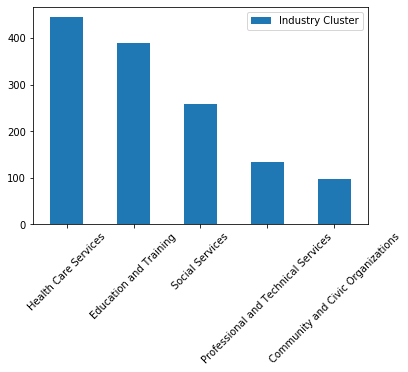

In [24]:
masters_industry_matplotlib = masters_top_industry.plot.bar()
plt.xticks(rotation=45)

In [26]:
masters_top_jobs = masters['SOC Title'].value_counts()
masters_top_jobs = pd.DataFrame(masters_top_jobs)
masters_top_jobs = masters_top_jobs.head()
masters_top_jobs

,SOC Title
"Community and Social Service Specialists, All Other",140
"Educational, Guidance, School, and Vocational Counselors",116
Instructional Coordinators,110
Healthcare Social Workers,92
Statisticians,88


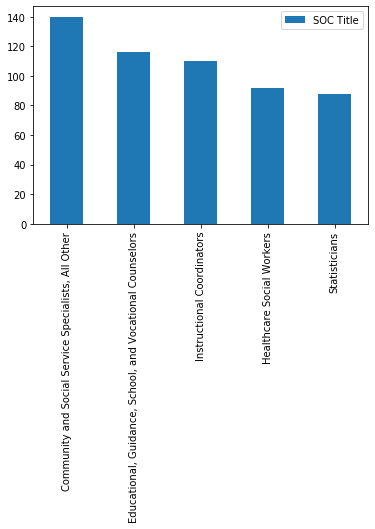

In [27]:
masters_jobs_matplotlib = masters_top_jobs.plot.bar()

In [28]:
a = masters[masters['SOC Title'] == 'Community and Social Service Specialists, All Other']
a = a["Median Annual Wage"].median(axis=0)
a = pd.DataFrame({"Wage (Median)":[a]})
a = a.rename(index={0: "Community and Social Service Specialists"})
a

,Wage (Median)
Community and Social Service Specialists,49569.0


In [30]:
b = masters[masters['SOC Title'] == 'Educational, Guidance, School, and Vocational Counselors']
b = b["Median Annual Wage"].median(axis=0)
b = pd.DataFrame({"Wage (Median)":[b]})
b = b.rename(index={0: "School and Vocational Counselors"})
b

,Wage (Median)
School and Vocational Counselors,60911.0


In [33]:
c = masters[masters['SOC Title'] == 'Instructional Coordinators']
c = c["Median Annual Wage"].median(axis=0)
c = pd.DataFrame({"Wage (Median)":[c]})
c = c.rename(index={0: "Instructional Coordinators"})
c

,Wage (Median)
Instructional Coordinators,74519.0


In [34]:
d = masters[masters['SOC Title'] == 'Healthcare Social Workers']
d = d["Median Annual Wage"].median(axis=0)
d = pd.DataFrame({"Wage (Median)":[d]})
d = d.rename(index={0: "Healthcare Social Workers"})
d
Statisticians

,Wage (Median)
Healthcare Social Workers,65680.0


In [36]:
e = masters[masters['SOC Title'] == 'Statisticians']
e = e["Median Annual Wage"].median(axis=0)
e = pd.DataFrame({"Wage (Median)":[e]})
e = e.rename(index={0: "Statisticians"})
e

,Wage (Median)
Statisticians,98679.0


In [37]:
frames = [a, b, c, d, e]
result = pd.concat(frames)
result

,Wage (Median)
Community and Social Service Specialists,49569.0
School and Vocational Counselors,60911.0
Instructional Coordinators,74519.0
Healthcare Social Workers,65680.0
Statisticians,98679.0
